In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dreams dataset
df = pd.read_csv('./data/dreams_raw_dataset.csv')

In [3]:
#Dataset preview
df.head()

,date_of_birth,date_of_enrollment,Agency,implementing_partner_name,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,NaN,58.0,Yes,Yes,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,NaN,43.0,Yes,Yes,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,NaN,41.0,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,NaN,45.0,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,NaN,42.0,Yes,Yes,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


In [4]:
df.columns

Index(['date_of_birth', 'date_of_enrollment', 'Agency',
       'implementing_partner_name', 'county', 'head_of_household',
       'head_of_household_other', 'age_of_household_head', 'father_alive',
       'mother_alive', 'are_both_parents_alive', 'is_one_parent_alive',
       'parents_alive_status', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_a

In [5]:
cols= ['head_of_household_other','is_one_parent_alive','parents_alive_status','dreams_program_other','exit_status','exit_reason',
'intervention_name','intervention_date','other_interventions','exit_reason_other','no_of_days_missed_food_in_4wks','Agency','date_of_enrollment']

In [6]:
df['county'].value_counts()

county
Nairobi    100411
Kisumu      82909
Homabay     79954
Migori      69846
Siaya       60411
Mombasa     31890
Kiambu      21130
Name: count, dtype: int64

In [6]:
df1 = df.drop(columns=cols)

In [7]:
df1.shape

(455807, 31)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_of_household_head,434789.0,2074.593380,1.106761e+06,-48.0,33.0,42.0,50.0,727284575.0
no_of_people_in_household,448607.0,5.774555,3.837220e+00,0.0,4.0,6.0,7.0,356.0
no_of_females,448475.0,3.330979,2.412982e+00,0.0,2.0,3.0,4.0,216.0
no_of_males,448125.0,2.443664,1.911644e+00,0.0,1.0,2.0,3.0,140.0
no_of_adults,448328.0,2.492278,1.295561e+00,0.0,2.0,2.0,3.0,77.0
no_of_children,448034.0,3.283115,3.433194e+00,0.0,2.0,3.0,4.0,328.0
age_at_first_sexual_encounter,226256.0,16.781363,2.099138e+01,0.0,15.0,17.0,18.0,4118.0
bio_medical,455807.0,0.990619,9.640113e-02,0.0,1.0,1.0,1.0,1.0
social_protection,455807.0,0.988105,1.084155e-01,0.0,1.0,1.0,1.0,1.0
behavioral,455807.0,0.882301,3.222517e-01,0.0,1.0,1.0,1.0,1.0


In [9]:
df1.describe(include='object').T

,count,unique,top,freq
date_of_birth,455807,7839,1/1/2000,1011
implementing_partner_name,455807,20,Afya Ziwani,101893
county,446551,7,Nairobi,100411
head_of_household,446192,8,Father,173119
father_alive,442399,3,Yes,295841
mother_alive,442820,3,Yes,378897
are_both_parents_alive,455807,2,Yes,273198
ever_missed_full_day_food_in_4wks,448640,2,Yes,257179
currently_in_school,451634,2,Yes,263268
current_school_level,254941,6,Secondary Level,132952


In [10]:
df1.isna().sum()

date_of_birth                             0
implementing_partner_name                 0
county                                 9256
head_of_household                      9615
age_of_household_head                 21018
father_alive                          13408
mother_alive                          12987
are_both_parents_alive                    0
no_of_people_in_household              7200
no_of_females                          7332
no_of_males                            7682
no_of_adults                           7479
no_of_children                         7773
ever_missed_full_day_food_in_4wks      7167
currently_in_school                    4173
current_school_level                 200866
current_income_source                129564
ever_tested_for_hiv                       0
last_test_result                          0
ever_had_sex                           7727
age_at_first_sexual_encounter        229551
has_sexual_partner                   229506
age_of_last_partner             

In [11]:
df1['result'].isna().sum()

0

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   implementing_partner_name          455807 non-null  object 
 2   county                             446551 non-null  object 
 3   head_of_household                  446192 non-null  object 
 4   age_of_household_head              434789 non-null  float64
 5   father_alive                       442399 non-null  object 
 6   mother_alive                       442820 non-null  object 
 7   are_both_parents_alive             455807 non-null  object 
 8   no_of_people_in_household          448607 non-null  float64
 9   no_of_females                      448475 non-null  float64
 10  no_of_males                        448125 non-null  float64
 11  no_of_adults                       4483

In [13]:
df1.duplicated().sum()

451

In [14]:
#check for duplicates and remove if any
df1 = df1.drop_duplicates()

In [15]:
df1.duplicated().sum()

0

## Data cleaning using pipeline, and baseline model

In [16]:
#target and predictors
X = df1.drop('result', axis=1)
y = df1['result'].map({'Negative':0, 'Positive':1})

In [17]:
#train and test splits
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
num_cols = ['age_of_household_head', 'no_of_people_in_household', 'no_of_females', 'no_of_males', 'no_of_adults', 'no_of_children',
 'age_at_first_sexual_encounter', 'bio_medical', 'social_protection', 'behavioral', 'post_gbv_care', 'exit_age']

cat_cols = ['date_of_birth', 'implementing_partner_name', 'county', 'head_of_household', 'father_alive', 'mother_alive',
 'are_both_parents_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'current_school_level', 'current_income_source',
 'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex', 'has_sexual_partner', 'age_of_last_partner', 'used_condom_with_last_partner',
 'dreams_program']

In [19]:
print(type(cat_cols))

<class 'list'>


In [20]:
#Pipeline to clean, impute missing values
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('ohe', OneHotEncoder(handle_unknown='ignore')) 
])

#preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [21]:
#Baseline model as logistic regression
pipe_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced'))
])

In [22]:
#Fit baseline model
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age_of_household_head',
                                                   'no_of_people_in_household',
                                                   'no_of_females',
                                                   'no_of_males',
                                                   'no_of_adults',
                                                   'no_of_children',
                                                   'age_at_first_sexual_encounter',
                                                   'bio_medical',
                                                   'social_protection',
                                                   'behavi...
                                                   'mother_alive',
                                                   'are_both_parents_alive',
                                                   'ever_missed_full_day_food_in_4wks',
                                                   'currently_in_school',
                                                   'current_school_level',
                                                   'current_income_source',
                                                   'ever_tested_for_hiv',
                                                   'last_test_result',
                                                   'ever_had_sex',
                                                   'has_sexual_partner',
                                                   'age_of_last_partner',
                                                   'used_condom_with_last_partner',
                                                   'dreams_program'])])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [23]:
#Make predictions
y_pred = pipe_model.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 90.95%


In [25]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[82780  8078]
 [  163    51]]


In [26]:
#Evaluate model performance

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Precision: 0.63%
Recall: 23.83%
F1 Score: 1.22%


In [27]:
#Observation
#Classifier is heavily biased towards dominant class(negative class)
# Model performance is very low despite setting class_weight to 'balanced'

## Undersampling dominant class to match minority class

In [28]:
#balancing classes 
negative_class = df1[df1['result']=='Negative']
positive_class = df1[df1['result']=='Positive']

In [29]:
# Undersampling the majority negative class to match the size of the minority positive class
negative_class_undersampled = negative_class.sample(n=len(positive_class), random_state=42)

In [30]:
# Concatinate the undersampled negative class with the positive class
balanced_df = pd.concat([negative_class_undersampled, positive_class])

In [31]:
# Randomly shuffle the balanced dataset and reset index
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [32]:
# Separate predictor features and target
X_balanced = balanced_df.drop(columns=['result'])
y_balanced = balanced_df['result'].map({'Negative':0, 'Positive':1})

In [33]:
#train and test splits
X_train_balanced, X_test_balanced, y_train_balanced,y_test_balanced= train_test_split(X_balanced,y_balanced, test_size=0.2, random_state=42)

In [34]:
# Fit model on balanced set
pipe_model.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age_of_household_head',
                                                   'no_of_people_in_household',
                                                   'no_of_females',
                                                   'no_of_males',
                                                   'no_of_adults',
                                                   'no_of_children',
                                                   'age_at_first_sexual_encounter',
                                                   'bio_medical',
                                                   'social_protection',
                                                   'behavi...
                                                   'mother_alive',
                                                   'are_both_parents_alive',
                                                   'ever_missed_full_day_food_in_4wks',
                                                   'currently_in_school',
                                                   'current_school_level',
                                                   'current_income_source',
                                                   'ever_tested_for_hiv',
                                                   'last_test_result',
                                                   'ever_had_sex',
                                                   'has_sexual_partner',
                                                   'age_of_last_partner',
                                                   'used_condom_with_last_partner',
                                                   'dreams_program'])])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [35]:
#Make predictions
y_pred_balanced = pipe_model.predict(X_test_balanced)

In [36]:
# confusion matrix for balanced dataset
cm_bal = confusion_matrix(y_test_balanced, y_pred_balanced)
print("Confusion Matrix:\n", cm_bal)

Confusion Matrix:
 [[150  60]
 [ 55 143]]


In [37]:
accuracy = accuracy_score(y_test_balanced, y_pred_balanced)
precision = precision_score(y_test_balanced, y_pred_balanced)
recall = recall_score(y_test_balanced, y_pred_balanced)
f1 = f1_score(y_test_balanced, y_pred_balanced)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 71.81%
Precision: 70.44%
Recall: 72.22%
F1 Score: 71.32%


## RandomForest model

In [40]:
#Randomforest model 
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_jobs=-1))
])

In [41]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age_of_household_head',
                                                   'no_of_people_in_household',
                                                   'no_of_females',
                                                   'no_of_males',
                                                   'no_of_adults',
                                                   'no_of_children',
                                                   'age_at_first_sexual_encounter',
                                                   'bio_medical',
                                                   'social_protection',
                                                   'behavi...
                                                   'father_alive',
                                                   'mother_alive',
                                                   'are_both_parents_alive',
                                                   'ever_missed_full_day_food_in_4wks',
                                                   'currently_in_school',
                                                   'current_school_level',
                                                   'current_income_source',
                                                   'ever_tested_for_hiv',
                                                   'last_test_result',
                                                   'ever_had_sex',
                                                   'has_sexual_partner',
                                                   'age_of_last_partner',
                                                   'used_condom_with_last_partner',
                                                   'dreams_program'])])),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [42]:
y_rf_pred = rf_model.predict(X_test)

In [43]:
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred)
rf_recall = recall_score(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred)

print(f'Accuracy: {rf_accuracy*100:.2f}%')
print(f"Precision: {rf_precision*100:.2f}%")
print(f"Recall: {rf_recall*100:.2f}%")
print(f"F1 Score: {rf_f1*100:.2f}%")


Accuracy: 99.77%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


In [44]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_rf_pred)
print("Confusion Matrix:\n", cm_rf)

Confusion Matrix:
 [[90858     0]
 [  214     0]]


In [45]:
# Fit model on balanced set
rf_model.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age_of_household_head',
                                                   'no_of_people_in_household',
                                                   'no_of_females',
                                                   'no_of_males',
                                                   'no_of_adults',
                                                   'no_of_children',
                                                   'age_at_first_sexual_encounter',
                                                   'bio_medical',
                                                   'social_protection',
                                                   'behavi...
                                                   'father_alive',
                                                   'mother_alive',
                                                   'are_both_parents_alive',
                                                   'ever_missed_full_day_food_in_4wks',
                                                   'currently_in_school',
                                                   'current_school_level',
                                                   'current_income_source',
                                                   'ever_tested_for_hiv',
                                                   'last_test_result',
                                                   'ever_had_sex',
                                                   'has_sexual_partner',
                                                   'age_of_last_partner',
                                                   'used_condom_with_last_partner',
                                                   'dreams_program'])])),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [46]:
y_rf_pred_bal = rf_model.predict(X_test_balanced)

In [47]:
rf_accuracy_bal = accuracy_score(y_test_balanced, y_rf_pred_bal)
rf_precision_bal = precision_score(y_test_balanced, y_rf_pred_bal)
rf_recall_bal = recall_score(y_test_balanced, y_rf_pred_bal)
rf_f1_bal = f1_score(y_test_balanced, y_rf_pred_bal)

print(f'Accuracy: {rf_accuracy_bal*100:.2f}%')
print(f"Precision: {rf_precision_bal*100:.2f}%")
print(f"Recall: {rf_recall_bal*100:.2f}%")
print(f"F1 Score: {rf_f1_bal*100:.2f}%")

Accuracy: 71.32%
Precision: 70.98%
Recall: 69.19%
F1 Score: 70.08%


In [48]:
cm_rf_bal = confusion_matrix(y_test_balanced, y_rf_pred_bal)
print("Confusion Matrix:\n", cm_rf_bal)

Confusion Matrix:
 [[154  56]
 [ 61 137]]


In [49]:
# Extract the feature importances from the trained model
importances = rf_model.named_steps['clf'].feature_importances_

In [50]:
encoded_columns = rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(X.select_dtypes(include=['object']).columns)

In [51]:
# Combine the numeric and encoded categorical columns
feature_names = list(X.select_dtypes(include=['int64', 'float64']).columns) + list(encoded_columns)

In [52]:
# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [53]:
importance_df

,Feature,Importance
11,exit_age,0.055374
0,age_of_household_head,0.053149
5,no_of_children,0.037316
1,no_of_people_in_household,0.035423
6,age_at_first_sexual_encounter,0.031350
...,...,...
98,date_of_birth_1/3/2008,0.000002
554,date_of_birth_3/17/2004,0.000002
679,date_of_birth_4/2/2006,0.000002
369,date_of_birth_12/24/1992,0.000002


In [54]:
importance_df = importance_df.head(20)

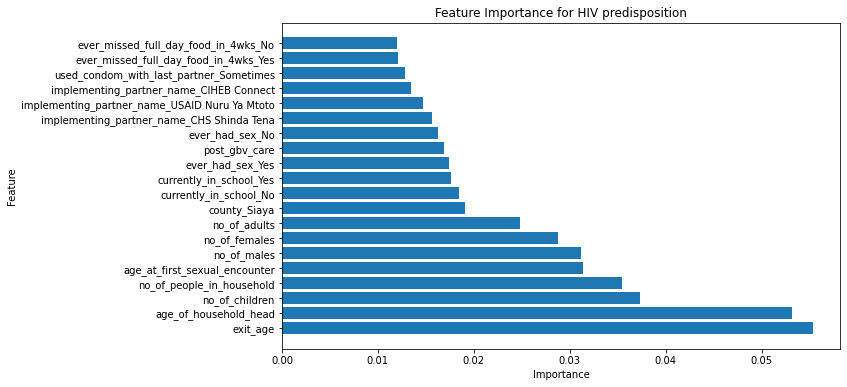

In [55]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for HIV predisposition')
plt.show()